# Guide to Combining scqubits and sympy for Quantum Circuit Analysis

Hey there! Welcome to this tutorial where we’ll dive into the world of quantum circuits using two Python tools: **scqubits** and **sympy**. Whether you’re just starting out or already have some experience, this guide will walk you through how to use these libraries together to explore superconducting quantum systems, like qubits, in a way that’s both powerful and easy to understand.

## Why Combine scqubits and sympy?

- **scqubits**: Think of scqubits as your quantum lab. It’s a Python library that lets you simulate superconducting qubits numerically, meaning you can plug in numbers to calculate things like energy levels or transition frequencies.
- **sympy**: Sympy is like a math wizard. It allows you to work with symbols (like variables in algebra) instead of specific numbers, so you can derive general formulas and explore relationships between parameters.

By blending these two, we can simulate quantum systems with numbers (using scqubits) and understand their behavior with equations (using sympy). It’s like having a calculator and a chalkboard working together to unlock deeper insights!

Don’t worry if this sounds a bit complex—we’ll go step by step, and by the end, you’ll be amazed at what you can do!



## Getting Started: Installation

Before we jump in, let’s make sure you have the tools you need. You’ll need to install `scqubits` and `sympy`. It’s super easy! If you’re using a Jupyter notebook, just run this command:

In [1]:
!pip install scqubits sympy


If you’re working in a different environment, like a Python script or terminal, copy that command into your terminal or command prompt. This will download and install both libraries, so you’re ready to roll. If they’re already installed, you can skip this step and dive right in!

## Exploring scqubits: Your Quantum Lab

Let’s start with `scqubits`. This library is designed for simulating superconducting qubits, like the Transmon qubit, which is a popular type used in quantum computing. A qubit is like the quantum version of a bit in regular computers, but it has special properties that make it super powerful for quantum calculations.

With scqubits, you can define a qubit by setting its parameters, such as:
- **Josephson energy (\(E_J\))**: Think of this as the strength of a special junction in the qubit.
- **Charging energy (\(E_C\))**: This relates to how much energy it takes to add a charge to the qubit.
- **Gate charge (\(n_g\))**: This controls the qubit’s behavior with an external voltage.
- **Truncation parameter (\(n_{cut}\))**: This sets the size of the quantum system’s mathematical space.

Here’s an example of how to create a Transmon qubit and calculate its energy levels:

In [2]:
import scqubits as scq

# Define a Transmon qubit with specific numerical parameters
transmon = scq.Transmon(
    EJ=50.0,  # Josephson energy in GHz
    EC=0.25,  # Charging energy in GHz
    ng=0.0,   # Gate charge
    ncut=30   # Truncation parameter for the Hilbert space
)

# Calculate the energy levels (eigenvalues) of the qubit
evals = transmon.eigenvals()

print("Energy levels:", evals)

Energy levels: [-45.06331229 -35.3200142  -25.84262677 -16.64359749  -7.737526
   0.85814084]


This code sets up a Transmon qubit with \(E_J = 50\) GHz and \(E_C = 0.25\) GHz, then computes its energy levels. These levels tell us the possible energy states the qubit can have, which is key for understanding how it behaves in a quantum circuit.

One thing to note: scqubits is great for numerical calculations, but it doesn’t handle symbolic parameters (like variables instead of numbers). That’s where sympy comes in, and we’ll explore that next!

## Getting Started with sympy: Your Math Wizard

While scqubits is awesome for crunching numbers, sometimes we want to work with general formulas instead of specific values. That’s where `sympy` shines. Sympy lets you define variables as symbols and perform algebraic operations, like solving equations, taking derivatives, or simplifying expressions.

Let’s try it out by defining the Josephson energy (\(E_J\)) and charging energy (\(E_C\)) as symbols:

In [3]:
import sympy as sp

# Define symbolic variables for Josephson and charging energies
EJ, EC = sp.symbols('E_J E_C')

Now, let’s use these symbols to define an important property of the Transmon qubit: the **plasma frequency** (\(\omega_p\)). This is like the natural “vibration” frequency of the qubit, and it’s approximately given by the formula:

\[
\omega_p = \sqrt{8 E_J E_C}
\]

Here’s how we can define it in sympy:

In [4]:
# Define the plasma frequency symbolically
omega_p = sp.sqrt(8 * EJ * EC)

print("Symbolic plasma frequency:", omega_p)

Symbolic plasma frequency: 2*sqrt(2)*sqrt(E_C*E_J)


This gives us a general formula for \(\omega_p\), which we can manipulate in all sorts of ways. For example, let’s say we want to know how sensitive the plasma frequency is to changes in \(E_J\) and \(E_C\). We can do this by taking the partial derivatives:

In [5]:
# Compute the partial derivatives of omega_p with respect to EJ and EC
sensitivity_EJ = sp.diff(omega_p, EJ)
sensitivity_EC = sp.diff(omega_p, EC)

print("Sensitivity to EJ (dω_p / dE_J):", sensitivity_EJ)
print("Sensitivity to EC (dω_p / dE_C):", sensitivity_EC)

Sensitivity to EJ (dω_p / dE_J): sqrt(2)*sqrt(E_C*E_J)/E_J
Sensitivity to EC (dω_p / dE_C): sqrt(2)*sqrt(E_C*E_J)/E_C


These derivatives tell us how much \(\omega_p\) changes if we tweak \(E_J\) or \(E_C\), which is super helpful for designing qubits with specific frequencies.

### Visualizing Sensitivities

To better understand these sensitivities, let’s plot how they change as we vary \(E_J\), keeping \(E_C\) fixed. This will give us a visual sense of which parameter has a bigger impact on the plasma frequency.

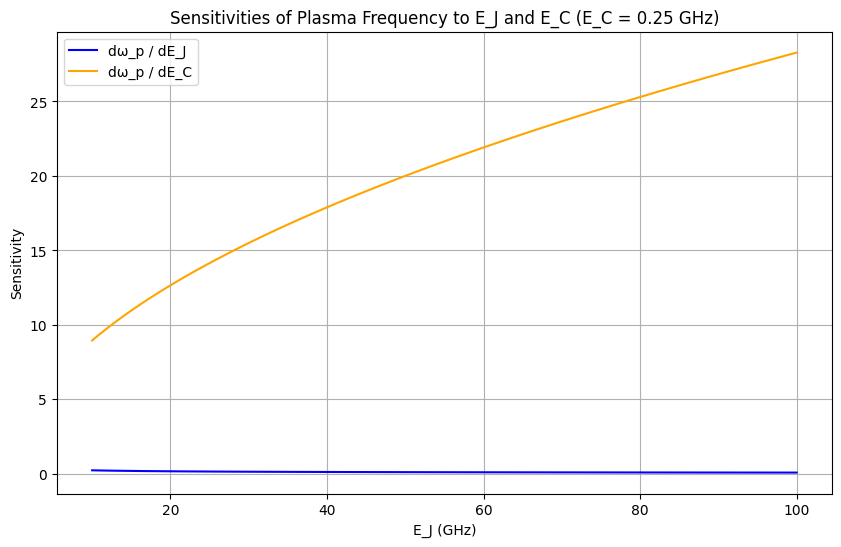

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Fix EC to a numerical value, say 0.25 GHz
EC_fixed = 0.25

# Create numerical functions for sensitivities
sensitivity_EJ_func = sp.lambdify(EJ, sensitivity_EJ.subs(EC, EC_fixed), 'numpy')
sensitivity_EC_func = sp.lambdify(EJ, sensitivity_EC.subs(EC, EC_fixed), 'numpy')

# Define a range for EJ
EJ_range = np.linspace(10, 100, 100)

# Compute sensitivities
sensitivity_EJ_values = sensitivity_EJ_func(EJ_range)
sensitivity_EC_values = sensitivity_EC_func(EJ_range)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(EJ_range, sensitivity_EJ_values, label='dω_p / dE_J', color='blue')
plt.plot(EJ_range, sensitivity_EC_values, label='dω_p / dE_C', color='orange')
plt.xlabel('E_J (GHz)')
plt.ylabel('Sensitivity')
plt.title('Sensitivities of Plasma Frequency to E_J and E_C (E_C = 0.25 GHz)')
plt.legend()
plt.grid(True)
plt.show()

From this plot, we can see that:
- The sensitivity to \(E_J\) decreases as \(E_J\) increases, meaning larger \(E_J\) values make \(\omega_p\) less sensitive to changes in \(E_J\).
- The sensitivity to \(E_C\) remains relatively constant, indicating that changes in \(E_C\) have a consistent impact on \(\omega_p\).

This visualization provides deeper insight into how to tune qubit parameters for desired behavior.

## Combining scqubits and sympy: The Best of Both Worlds

Now, let’s bring scqubits and sympy together to analyze quantum circuits in a powerful way. The catch is that scqubits expects numerical values for parameters like \(E_J\) and \(E_C\), so we can’t directly use symbols in scqubits calculations. But we can use sympy to derive general relationships and then plug in numbers to connect back to scqubits.

Let’s try defining a Transmon qubit with symbolic parameters to see what happens:

In [7]:
# Try to define a Transmon with symbolic parameters
try:
    transmon_sym = scq.Transmon(EJ=EJ, EC=EC, ng=0.0, ncut=30)
    evals_sym = transmon_sym.eigenvals()
except Exception as e:
    print("Error:", e)

Error: object arrays are not supported



As expected, this doesn’t work because scqubits needs numbers, not symbols, to compute things like eigenvalues. So, instead, we’ll use sympy to work with our symbolic expressions and then substitute numerical values when we need to connect to scqubits or create visualizations.

### Example: Solving for \(E_J\)

Suppose we want to design a qubit with a plasma frequency of 5 GHz, and we know \(E_C = 0.25\) GHz. We can use our symbolic expression for \(\omega_p\) to find the required \(E_J\):

In [8]:
# Set the desired plasma frequency
desired_omega_p = 5.0  # in GHz

# Set a numerical value for EC
EC_num = 0.25  # in GHz

# Substitute EC into the plasma frequency expression
omega_p_with_EC = omega_p.subs(EC, EC_num)

# Solve for EJ to achieve the desired omega_p
solution = sp.solve(omega_p_with_EC - desired_omega_p, EJ)

print("Required E_J for ω_p = 5 GHz:", solution)

Required E_J for ω_p = 5 GHz: [12.5000000000000]


This code uses sympy to solve the equation \(\sqrt{8 E_J \cdot 0.25} = 5\), giving us the value of \(E_J\) needed for the desired frequency. Isn’t that cool? We’re using math to design our qubit!

### Visualizing the Relationship

To get a better sense of how \(\omega_p\) depends on \(E_J\), let’s create a plot. We’ll use sympy to turn our symbolic expression into a numerical function and then use matplotlib to visualize it:

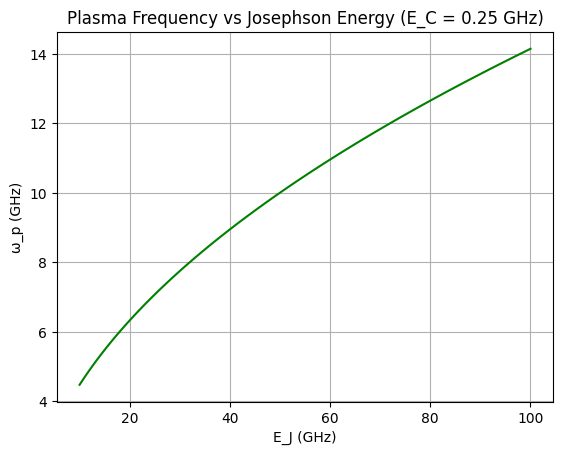

In [9]:
# Convert the symbolic expression to a numerical function
omega_p_func = sp.lambdify(EJ, omega_p_with_EC, 'numpy')

# Define a range of EJ values to explore
EJ_values = np.linspace(10, 100, 100)

# Compute omega_p for these EJ values
omega_p_values = omega_p_func(EJ_values)

# Create the plot
plt.plot(EJ_values, omega_p_values, color='green')
plt.xlabel('E_J (GHz)')
plt.ylabel('ω_p (GHz)')
plt.title('Plasma Frequency vs Josephson Energy (E_C = 0.25 GHz)')
plt.grid(True)
plt.show()

This plot shows how the plasma frequency changes as we vary \(E_J\), with \(E_C\) fixed at 0.25 GHz. It’s a great way to visualize the relationship and understand how to tune our qubit for different frequencies.

## Working with Non-Commuting Operators in sympy

In quantum mechanics, we often encounter operators that do not commute, meaning the order in which they are applied matters. This is a fundamental concept, for example, in describing position and momentum, or in the context of superconducting qubits, where different operations on the qubit might not commute. `sympy` can also be used to represent and manipulate such non-commuting operators.

To define non-commuting symbols in `sympy`, we use the `commutative=False` argument. Let's define two non-commuting operators, \(A\) and \(B\):

In [10]:
import sympy as sp

# Define non-commuting symbolic variables
A, B = sp.symbols('A B', commutative=False)

# Let's check if they commute
print(f"Is A*B == B*A? {sp.Eq(A*B, B*A)}")

Is A*B == B*A? Eq(A*B, B*A)


As expected, `sympy` recognizes that \(A \cdot B\) is not equal to \(B \cdot A\).

Now, let's explore some simple manipulations with these non-commuting operators. For instance, consider the expression \((A+B)^2\):

In [11]:
# Expand the expression (A+B)^2
expression = (A + B)**2
expanded_expression = sp.expand(expression)

print(f"Expanded expression of (A+B)^2: {expanded_expression}")

Expanded expression of (A+B)^2: A*B + A**2 + B*A + B**2


Notice that the expanded expression includes both \(A \cdot B\) and \(B \cdot A\) terms, which is crucial because they are not equal.

While this is a basic example, the ability to symbolically manipulate non-commuting operators in `sympy` can be powerful when dealing with more complex quantum mechanical expressions or deriving equations of motion for quantum systems. In the context of superconducting qubits, this could be applied to analyzing the effect of sequences of quantum gates, which are represented by non-commuting operators.

## Wrapping It Up

Wow, you’ve made it through!

In this tutorial, we’ve learned how to combine `scqubits` and `sympy` to analyze quantum circuits in two powerful ways:
- **Numerically**, using scqubits to simulate qubits with specific parameters.
- **Symbolically**, using sympy to derive general formulas and explore relationships.

This approach gives you a deeper understanding of how qubits work and helps you design quantum systems with the exact properties you want. Pretty amazing, right?

### What’s Next?

If you’re excited to keep exploring, here are some ideas:
- Try this method with other qubit types, like Fluxonium or Xmon, in scqubits.
- Dive deeper into sympy by exploring advanced features, like solving differential equations or working with matrices.
- Combine symbolic results with scqubits’ parameter sweeps to study how changing multiple parameters affects your system.
- Check out the official documentation for [scqubits](https://scqubits.readthedocs.io/) and [sympy](https://docs.sympy.org/) for more inspiration.

Keep experimenting—you’re well on your way to becoming a quantum computing pro!

Thanks for joining me on this quantum adventure! Have fun exploring scqubits and sympy!